In [1]:
from mne_bids import make_bids_basename
from pathlib import Path, PurePath
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)
from mne.time_frequency import csd_fourier, csd_multitaper, csd_morlet

import seaborn
import helper
import mne
import os
import matplotlib.pyplot as plt
import pandas as pd
import matlab.engine
import numpy as np
import scipy as sp
import scipy.io
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
from mne.time_frequency import psd_multitaper
%matplotlib 

# TODO 
# Power specturm analysis : drop bad channels, load data, create epochs and wavelets analysis


Using matplotlib backend: Qt5Agg


In [3]:
proc = 'BP'
subid = 'JuRo'
cfsubdir = Path('~','CIFAR_data','iEEG_10','subjects', subid, 'EEGLAB_datasets', 'bipolar_montage').expanduser()
fname = helper.CIFAR_filename(subid=subid,task='rest_baseline',proc=proc)
fpath = cfsubdir.joinpath(fname)
fpath = os.fspath(fpath)
raw = mne.io.read_raw_eeglab(fpath)

Reading /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_rest_baseline_1_preprocessed_BP_montage.fdt


<ipython-input-3-0f20965a4d1b>:7: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fpath)
<ipython-input-3-0f20965a4d1b>:7: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath)


In [11]:
bad_chan = ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6','RPs1-RPs2','EMG']
raw.info['bads'] = bad_chan

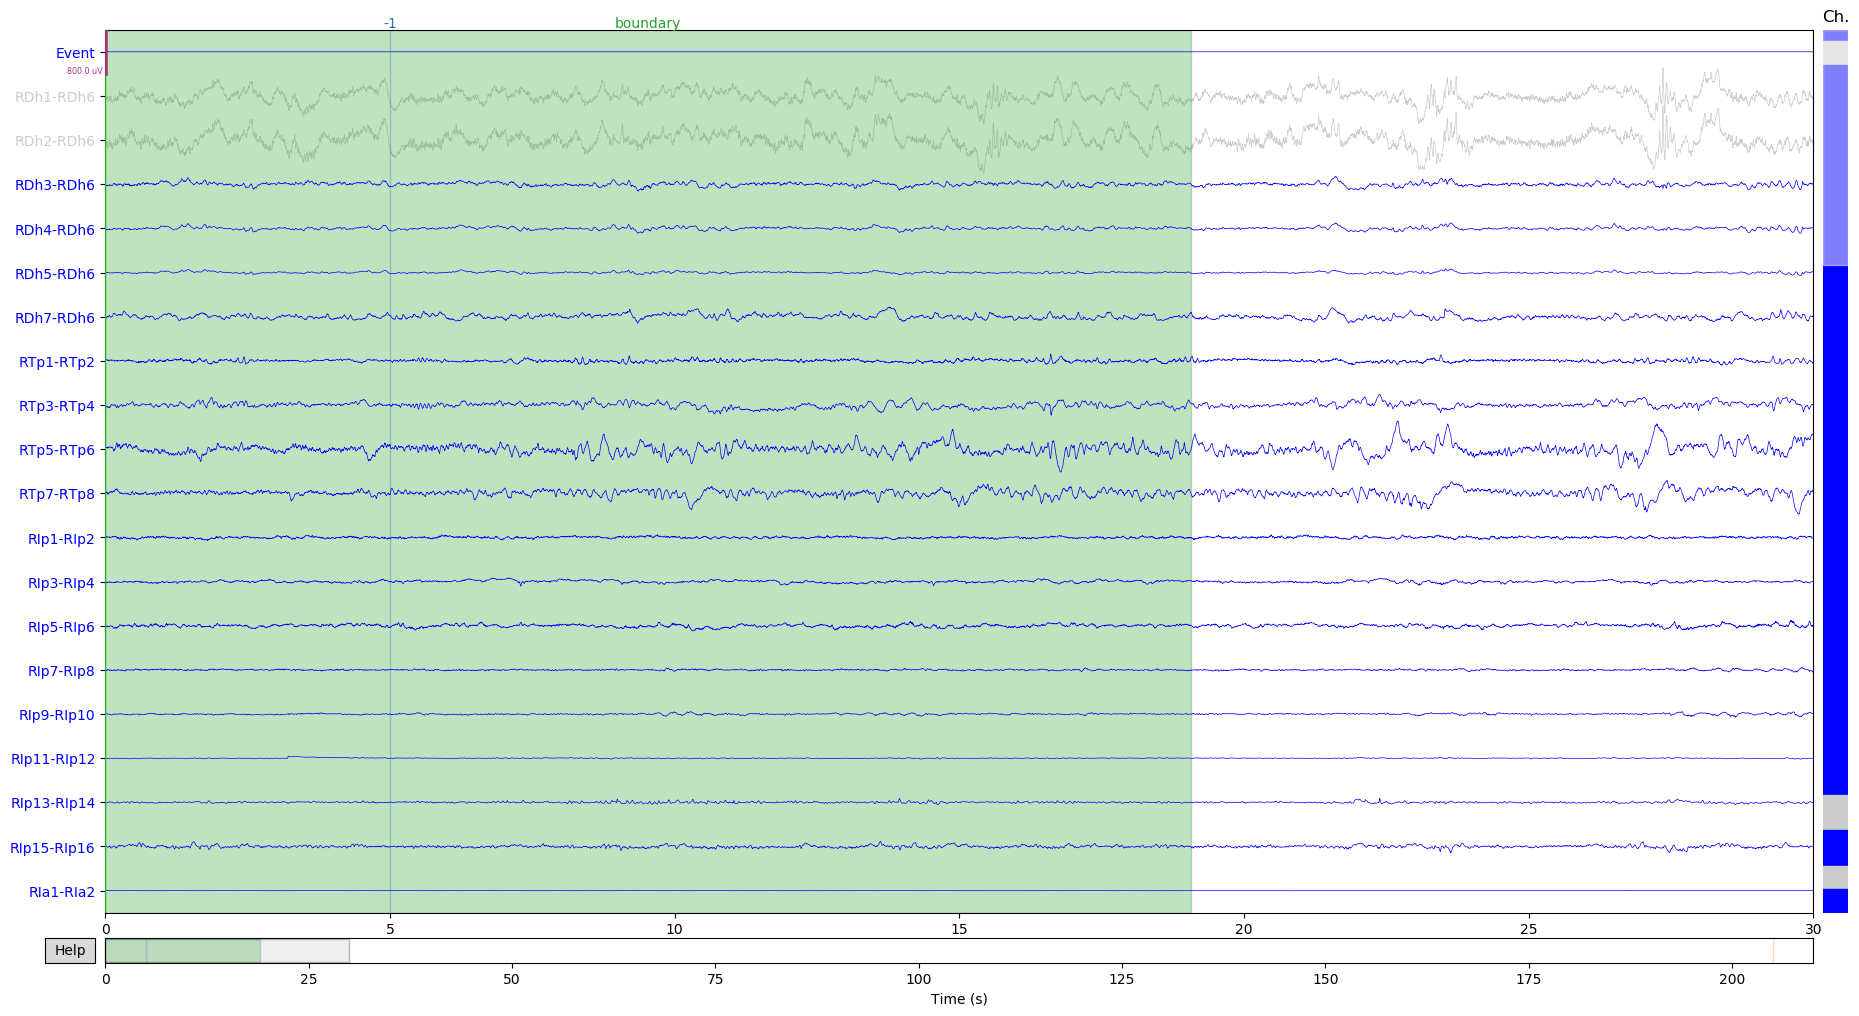

In [5]:
raw.plot(duration=30, n_channels=20, scalings=4e-4, color='b', butterfly=False)

In [12]:
events = mne.make_fixed_length_events(raw, duration=20)

In [13]:
epochs = mne.Epochs(raw, events, tmin=- 0.2, tmax=5, 
                    event_repeated='drop')

10 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [14]:
epochs.plot_psd(fmin=1, fmax=100, xscale='log',average=False)

Loading data for 10 events and 2601 original time points ...
1 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


/home/guime/anaconda3/envs/neuro/lib/python3.7/site-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/home/guime/anaconda3/envs/neuro/lib/python3.7/site-packages/matplotlib/colors.py:278: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


ValueError: Image size of 264758x467 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 2 Axes>

In [18]:
psds, freqs = psd_multitaper(epochs, low_bias=True)
psds = 10 * np.log10(psds)
psds_mean = psds.mean(0).mean(0)

plt.plot(freqs, psds_mean, color='b')
plt.xscale('log')
plt.xlim(xmin=1, xmax=50)

Loading data for 9 events and 2601 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


(1, 50)

In [42]:
# Power
freqs = np.arange(5., 30., 1.)
ncycles = freqs/2
power =  tfr_morlet(epochs, freqs=freqs,
                       n_cycles=ncycles, return_itc=False)


Applying baseline correction (mode: mean)


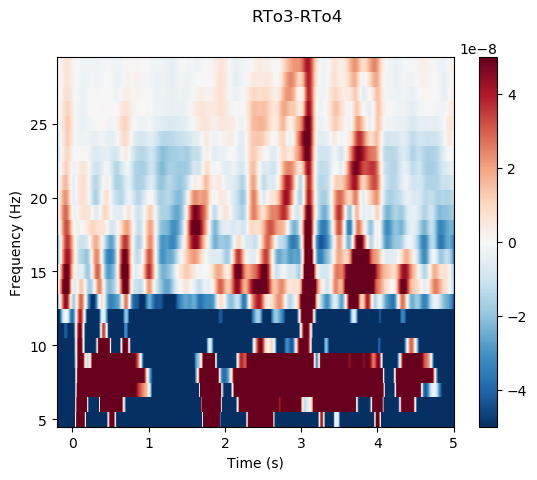

In [43]:
vmax = 5e-8
vmin = -vmax 
power.plot([37], baseline=(0., 0.1), vmin=vmin, vmax=vmax, mode='mean', show=False,
               colorbar=True)

In [26]:
epochs.load_data()

Loading data for 9 events and 2601 original time points ...


<Epochs  |   9 events (all good), -0.2 - 5 sec, baseline [None, 0], ~13.6 MB, data loaded,
 '1': 9>

In [38]:
csd_mt = csd_multitaper(epochs, fmin=5, fmax=20, adaptive=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Computing cross-spectral density from epochs...
    Computing CSD matrix for epoch 1
    Computing CSD matrix for epoch 2
    Computing CSD matrix for epoch 3
    Computing CSD matrix for epoch 4
    Computing CSD matrix for epoch 5
    Computing CSD matrix for epoch 6
    Computing CSD matrix for epoch 7
    Computing CSD matrix for epoch 8
    Computing CSD matrix for epoch 9
[done]


In [39]:
csd_mt.mean().plot(mode='coh')
plt.suptitle('adaptive multitapers')

Text(0.5, 0.98, 'adaptive multitapers')